In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.neighbors import NearestNeighbors

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('new hcv data imputed.csv')
data

,Unnamed: 0,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32.0,1,38.50,52.500000,7.7,22.1,7.50,6.93,3.23,106.0,12.10,69.0
1,1,32.0,1,38.50,70.300000,18.0,24.7,3.90,11.17,4.80,74.0,15.60,76.5
2,2,32.0,1,46.90,74.700000,36.2,25.0,6.10,8.84,5.20,86.0,33.20,79.3
3,3,32.0,1,43.20,52.000000,30.6,22.6,18.90,7.33,4.74,80.0,33.80,75.7
4,4,32.0,1,39.20,74.100000,32.6,24.8,9.60,9.15,4.32,76.0,29.90,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,610,62.0,0,32.00,66.300000,5.9,25.0,6.95,5.57,6.30,55.7,21.55,68.5
611,611,64.0,0,42.05,102.800000,2.9,44.4,20.00,8.27,3.02,63.0,35.90,71.3
612,612,64.0,0,42.05,87.300000,3.5,25.0,6.95,8.27,3.63,66.7,64.20,82.0
613,613,46.0,0,33.00,76.287690,39.0,25.0,20.00,3.56,4.20,52.0,50.00,71.0


In [3]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32.0,1,38.50,52.500000,7.7,22.1,7.50,6.93,3.23,106.0,12.10,69.0
1,32.0,1,38.50,70.300000,18.0,24.7,3.90,11.17,4.80,74.0,15.60,76.5
2,32.0,1,46.90,74.700000,36.2,25.0,6.10,8.84,5.20,86.0,33.20,79.3
3,32.0,1,43.20,52.000000,30.6,22.6,18.90,7.33,4.74,80.0,33.80,75.7
4,32.0,1,39.20,74.100000,32.6,24.8,9.60,9.15,4.32,76.0,29.90,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...
610,62.0,0,32.00,66.300000,5.9,25.0,6.95,5.57,6.30,55.7,21.55,68.5
611,64.0,0,42.05,102.800000,2.9,44.4,20.00,8.27,3.02,63.0,35.90,71.3
612,64.0,0,42.05,87.300000,3.5,25.0,6.95,8.27,3.63,66.7,64.20,82.0
613,46.0,0,33.00,76.287690,39.0,25.0,20.00,3.56,4.20,52.0,50.00,71.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     615 non-null    float64
 1   Sex     615 non-null    int64  
 2   ALB     615 non-null    float64
 3   ALP     615 non-null    float64
 4   ALT     615 non-null    float64
 5   AST     615 non-null    float64
 6   BIL     615 non-null    float64
 7   CHE     615 non-null    float64
 8   CHOL    615 non-null    float64
 9   CREA    615 non-null    float64
 10  GGT     615 non-null    float64
 11  PROT    615 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 57.8 KB


In [5]:
data.shape

(615, 12)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,615.0,47.359350,9.983829,19.00,39.000,47.00,54.000,76.00
Sex,615.0,0.613008,0.487458,0.00,0.000,1.00,1.000,1.00
ALB,615.0,42.065063,4.216063,29.20,39.200,42.05,45.100,54.40
ALP,615.0,66.938499,19.000122,11.30,52.950,66.30,79.300,120.20
ALT,615.0,23.721191,10.869086,0.90,16.400,21.50,29.400,57.70
AST,615.0,26.082114,6.834422,10.60,21.600,25.00,29.450,49.30
BIL,615.0,7.878293,3.875060,0.80,5.300,6.95,9.750,20.00
CHE,615.0,8.237138,1.795797,3.29,7.030,8.27,9.465,13.30
CHOL,615.0,5.323725,1.012162,2.61,4.625,5.30,6.020,8.11
CREA,615.0,78.067967,14.211795,40.00,68.000,76.70,88.000,119.00


<Axes: >

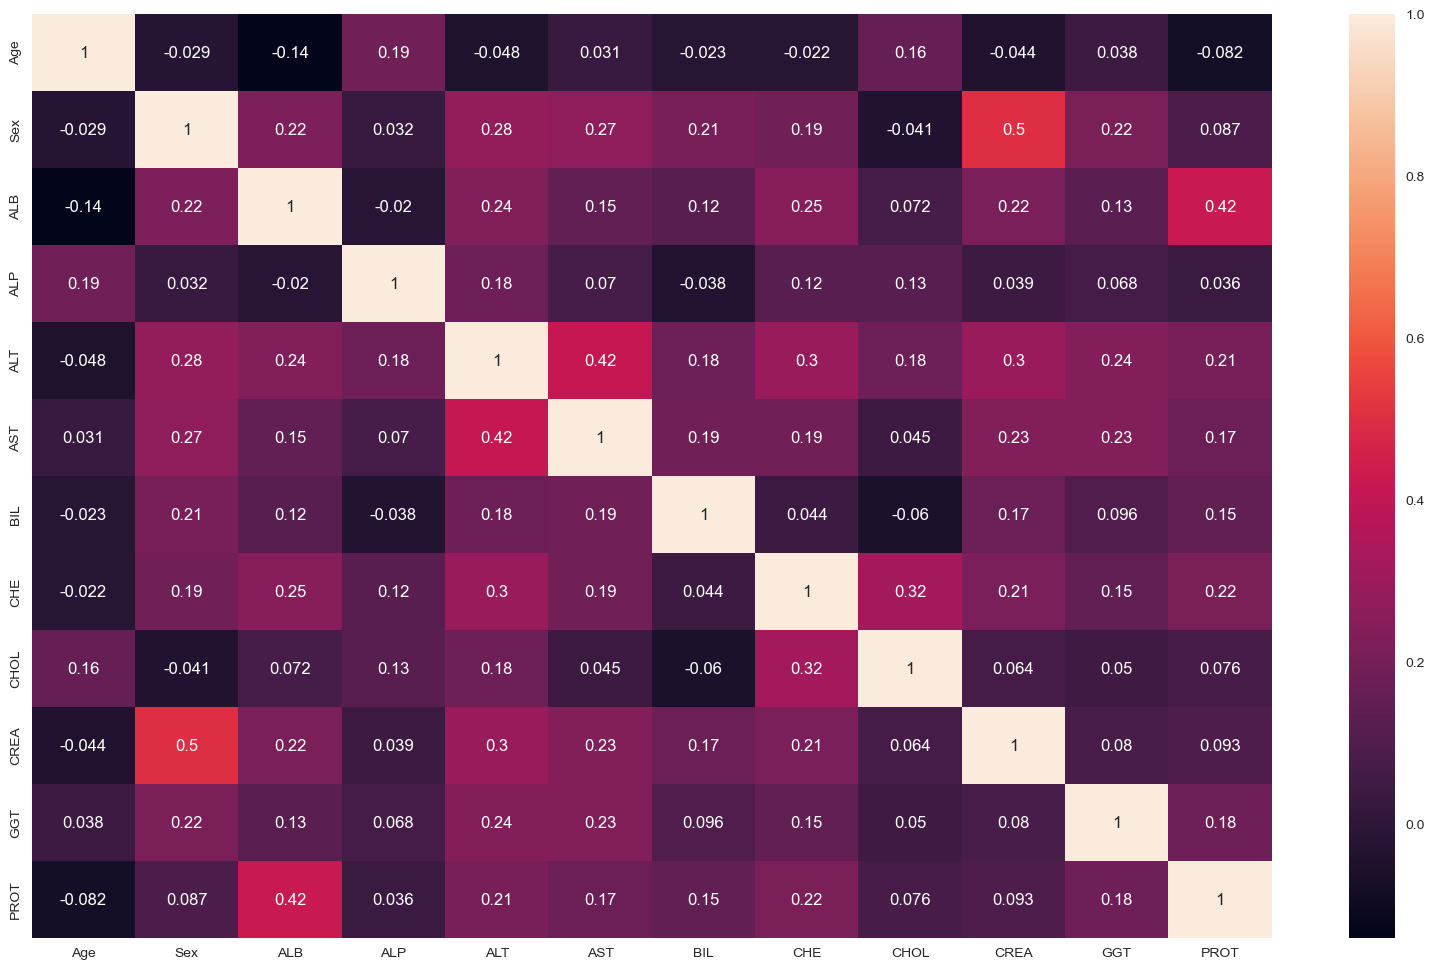

In [7]:
plt.figure(figsize=(20, 12))
sns.heatmap(data.corr(), annot=True)

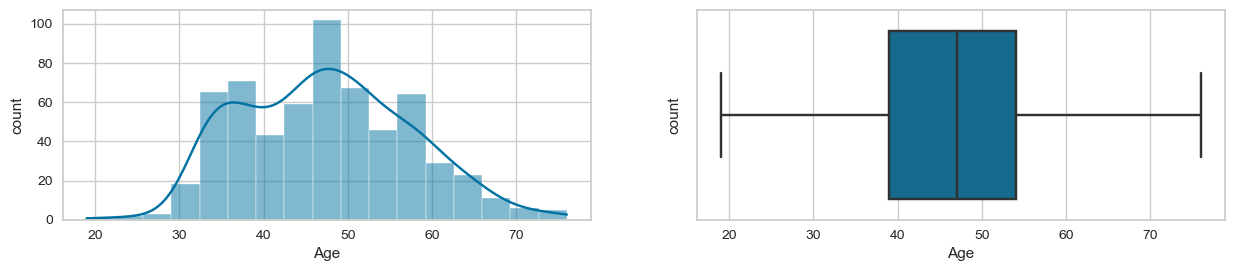

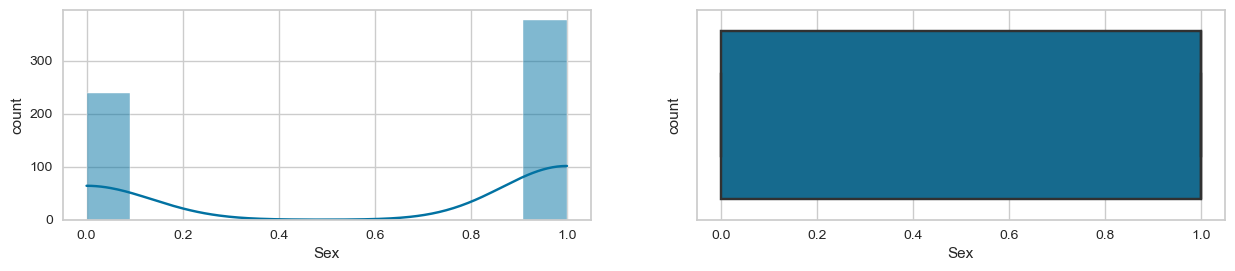

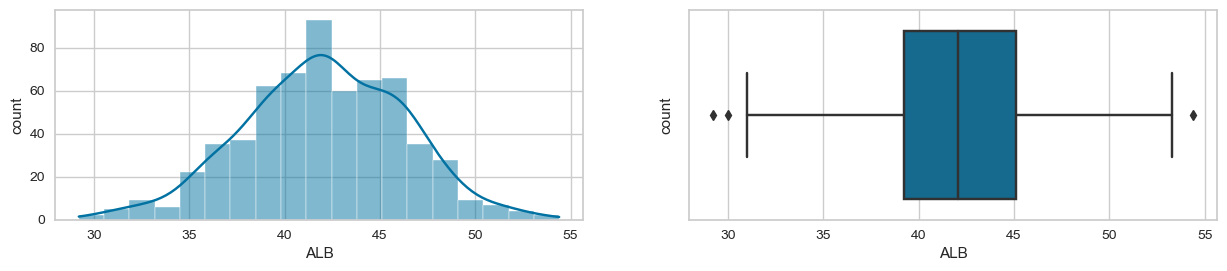

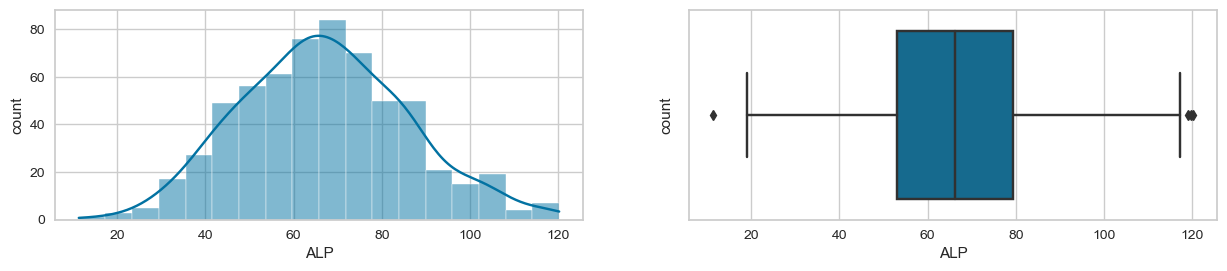

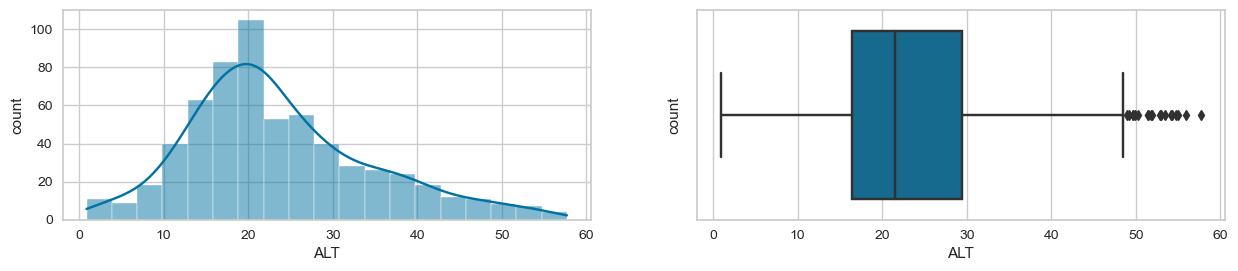

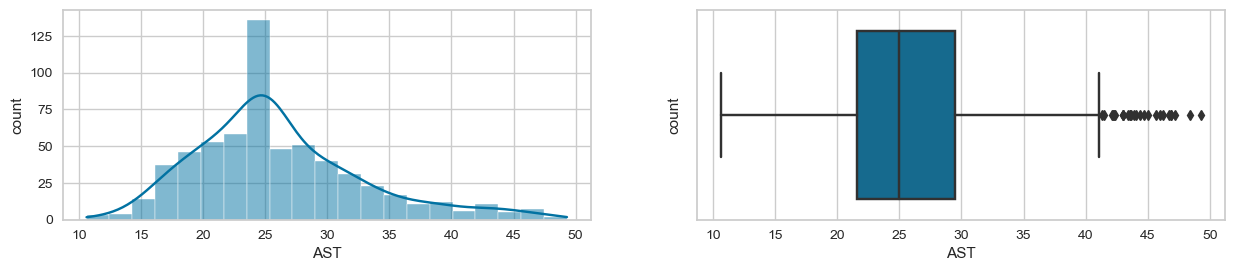

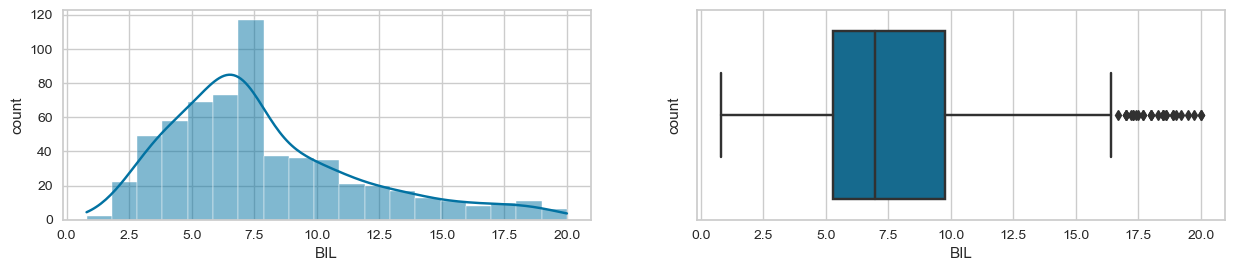

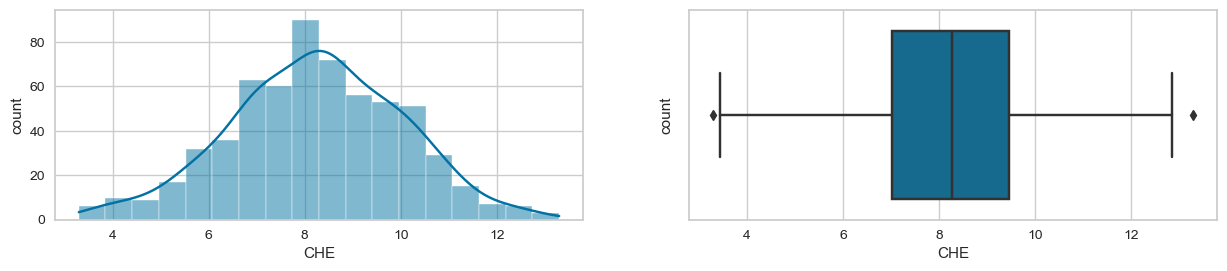

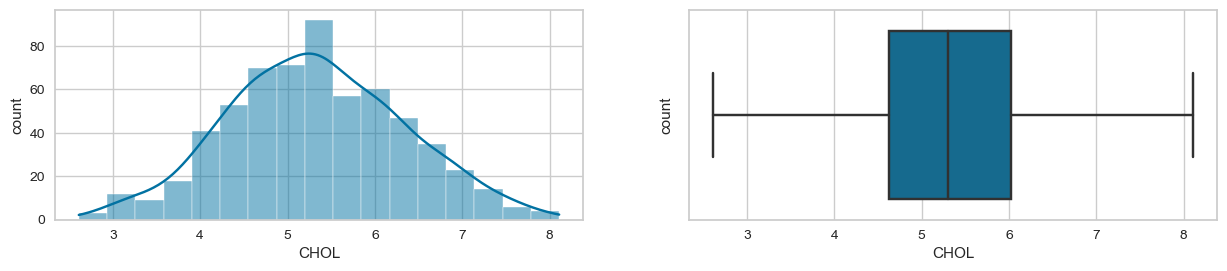

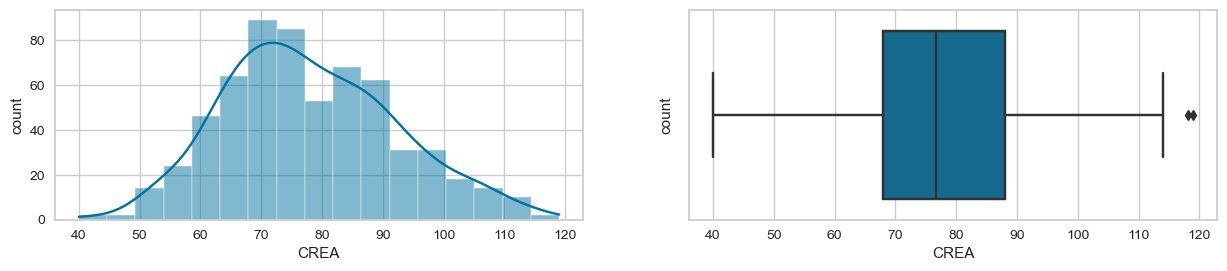

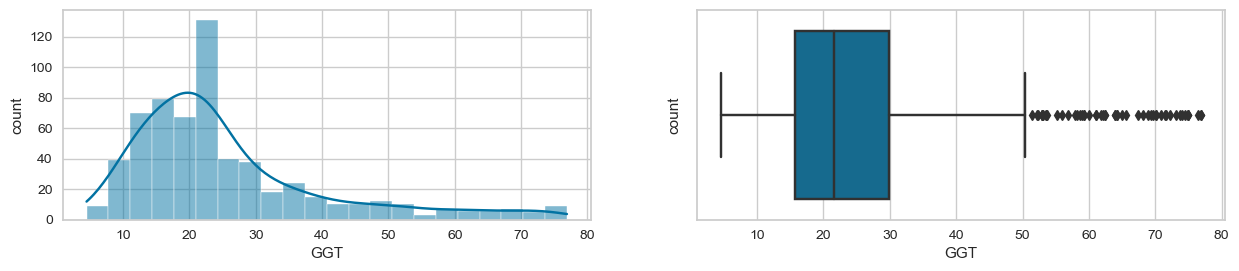

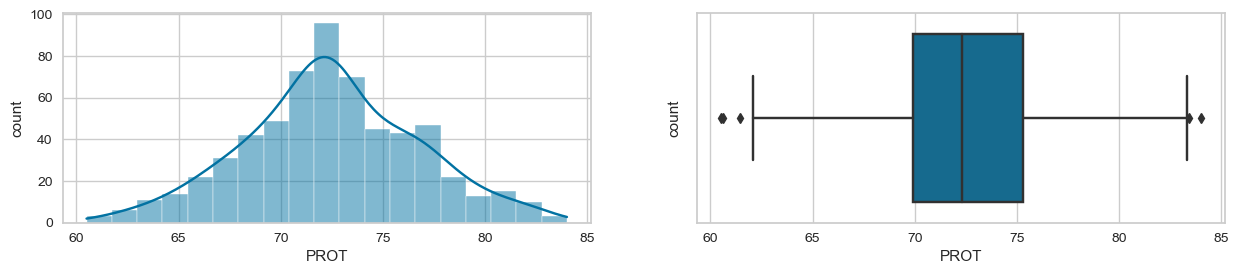

In [8]:
features = data.columns.tolist()

for feature in features:
    plt.figure(figsize=(15, 6))
    plt.subplot(2, 2, 1)
    sns.histplot(data, x=feature, kde=True)
    plt.xlabel(feature)
    plt.ylabel('count')

    plt.subplot(2, 2, 2)
    sns.boxplot(data=data, x=feature)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

In [9]:
c = data.corr().abs()
s = c.unstack()
so = s.sort_values(ascending=False)
so = so[(so<1) & (so>0.25)].drop_duplicates().to_frame()
so.columns = ['correlation']
so

,,correlation
Sex,CREA,0.497387
PROT,ALB,0.424034
AST,ALT,0.415445
CHE,CHOL,0.320196
CREA,ALT,0.296902
ALT,CHE,0.296575
Sex,ALT,0.278701
AST,Sex,0.270366


<Axes: xlabel='Sex', ylabel='CREA'>

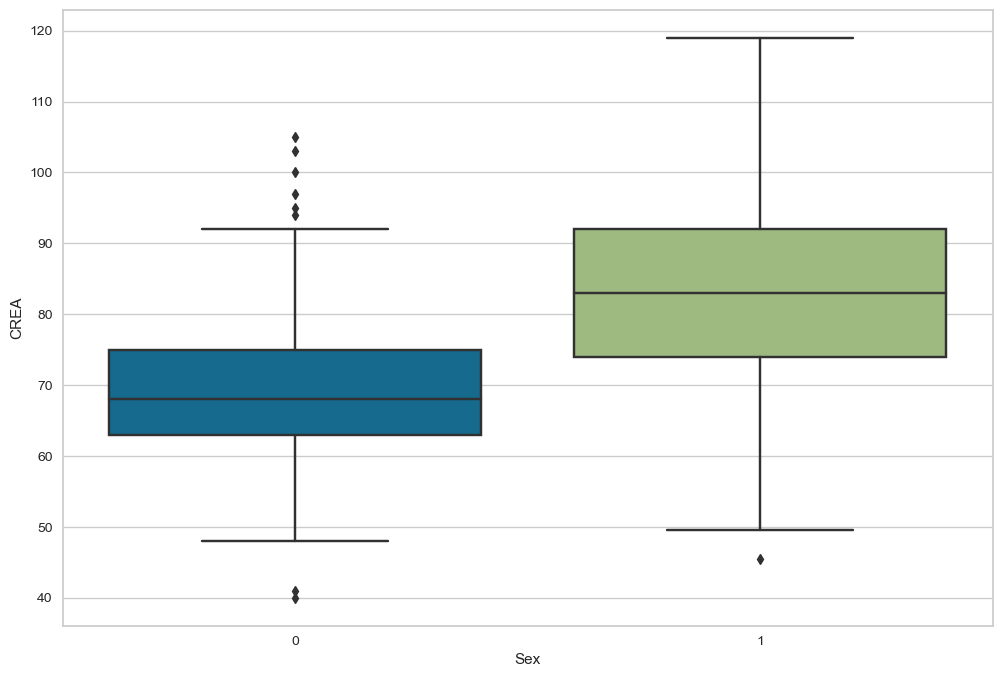

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Sex', y='CREA')

<Axes: xlabel='Sex', ylabel='ALT'>

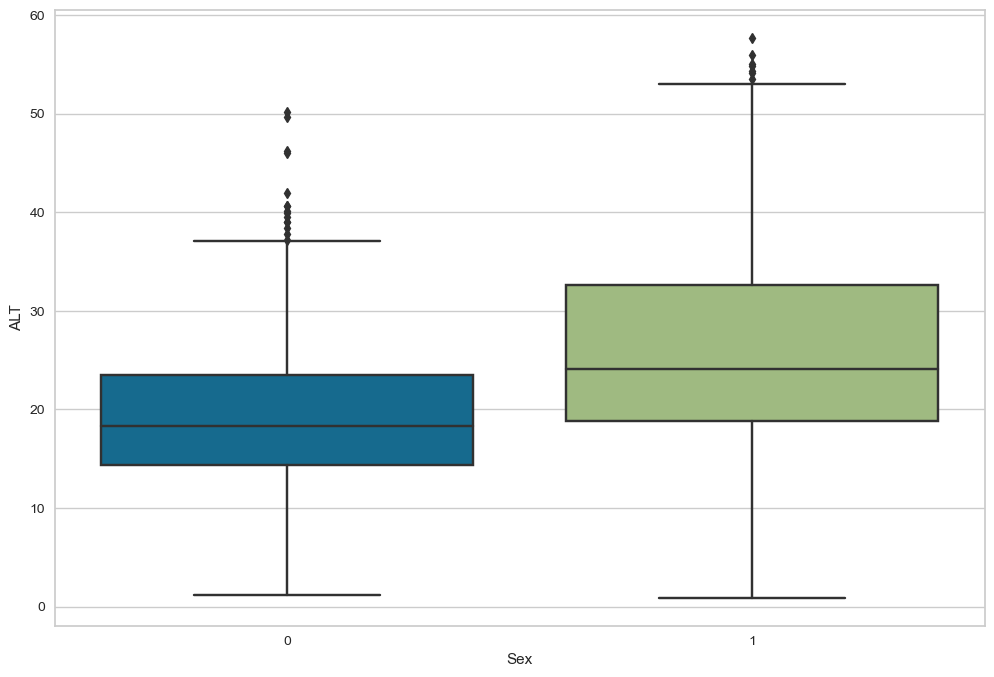

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Sex', y='ALT')

<Axes: xlabel='Sex', ylabel='AST'>

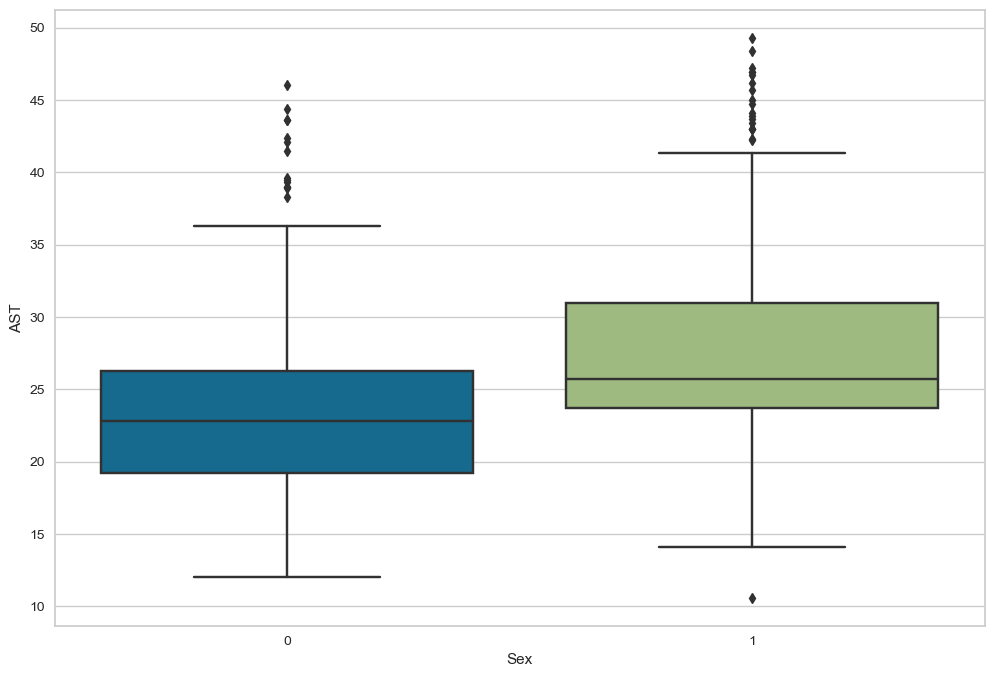

In [12]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Sex', y='AST')

<Axes: xlabel='PROT', ylabel='ALB'>

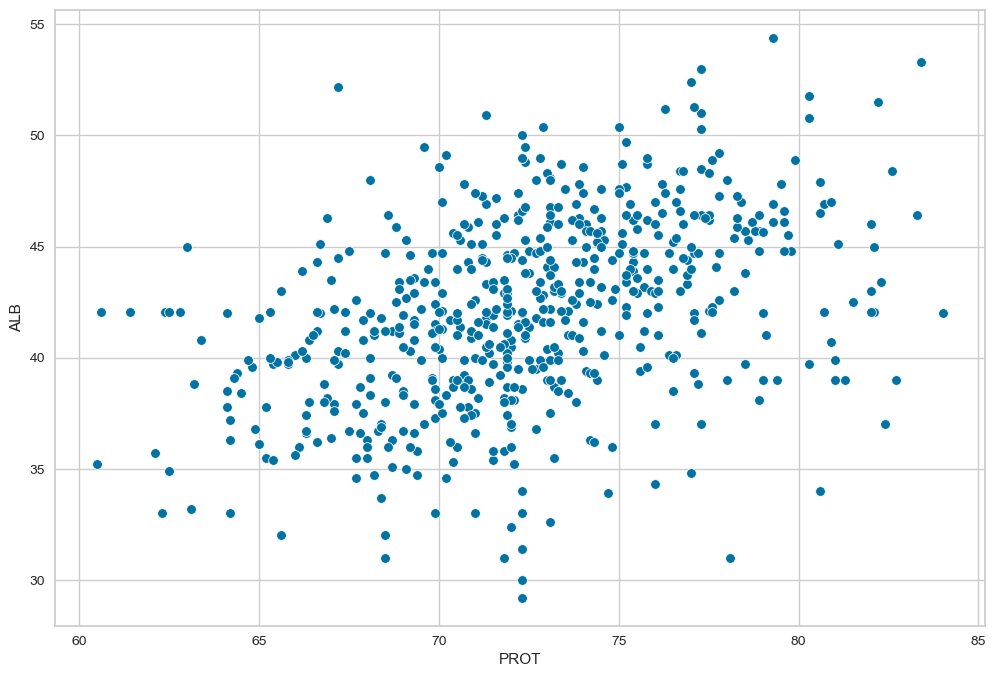

In [13]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='PROT', y='ALB')

<Axes: xlabel='ALT', ylabel='CHOL'>

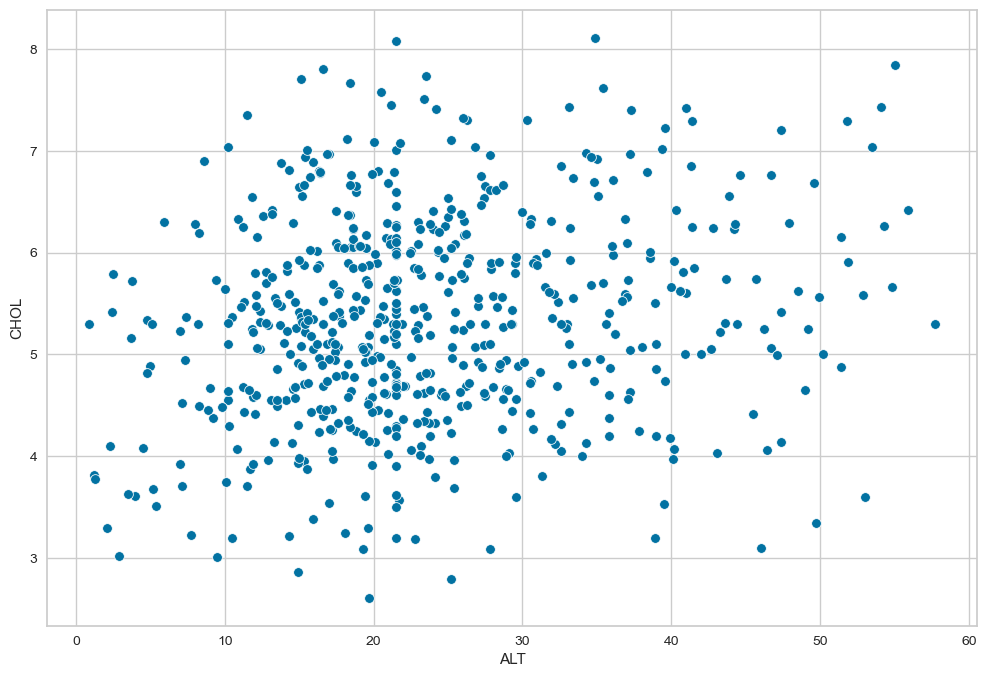

In [14]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='ALT', y='CHOL')

<Axes: xlabel='AST', ylabel='ALT'>

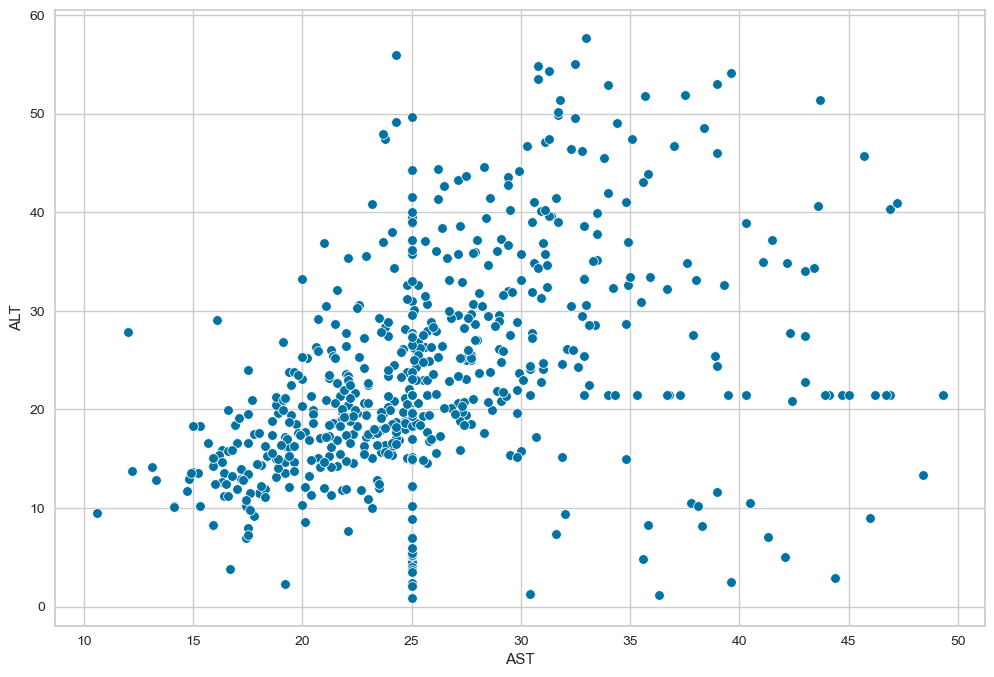

In [15]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='AST', y='ALT')

<Axes: xlabel='CHE', ylabel='CHOL'>

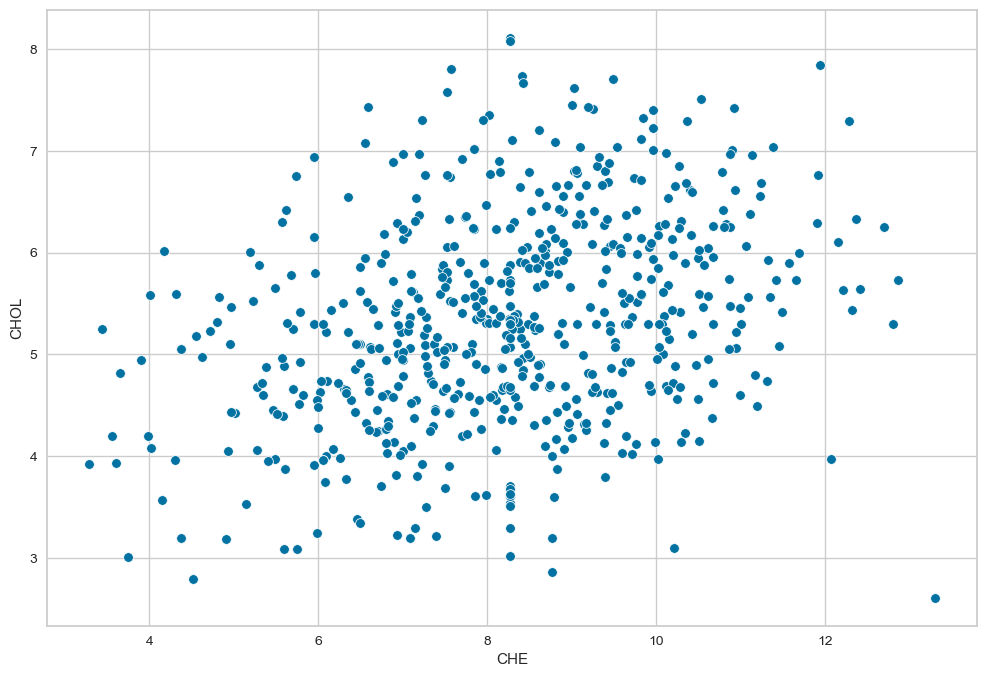

In [16]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='CHE', y='CHOL')

<Axes: xlabel='CREA', ylabel='ALT'>

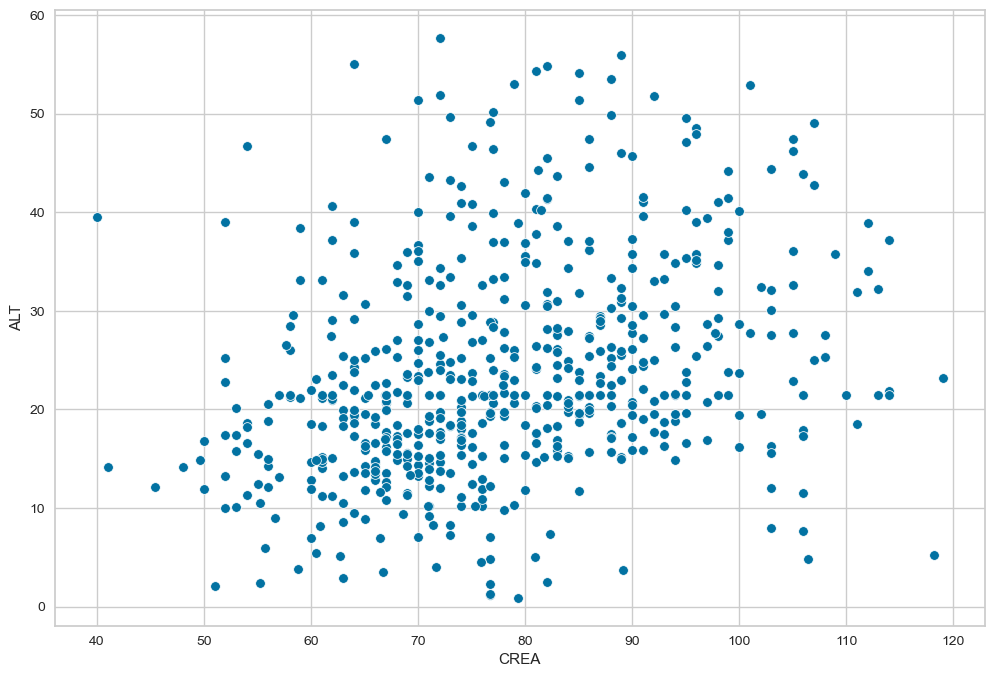

In [17]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='CREA', y='ALT')

<Axes: xlabel='ALT', ylabel='CHE'>

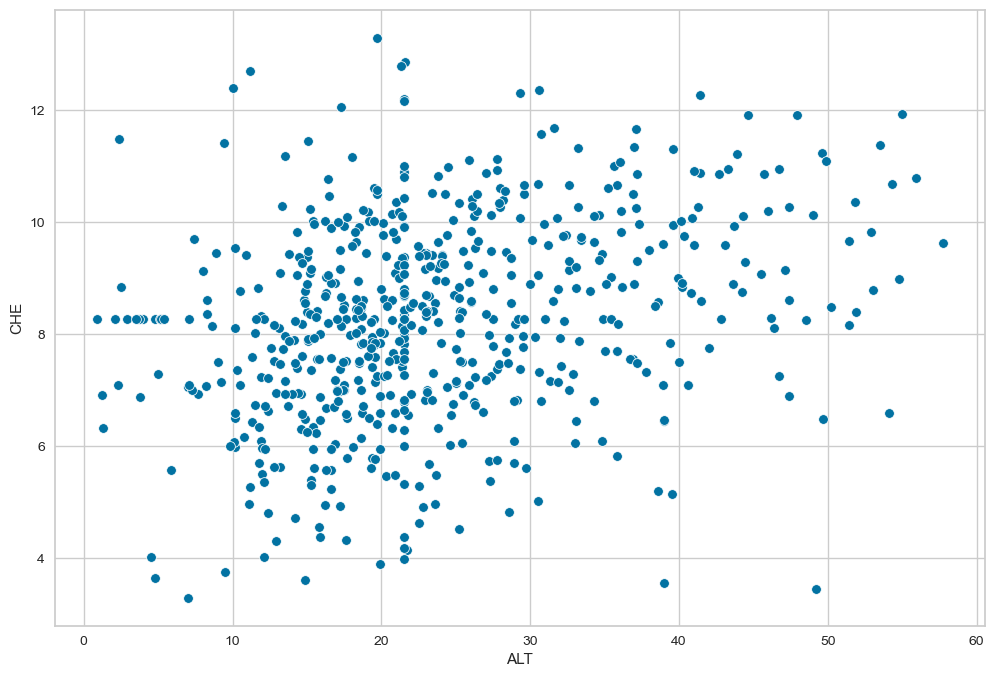

In [18]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='ALT', y='CHE')

<Axes: xlabel='PROT', ylabel='ALB'>

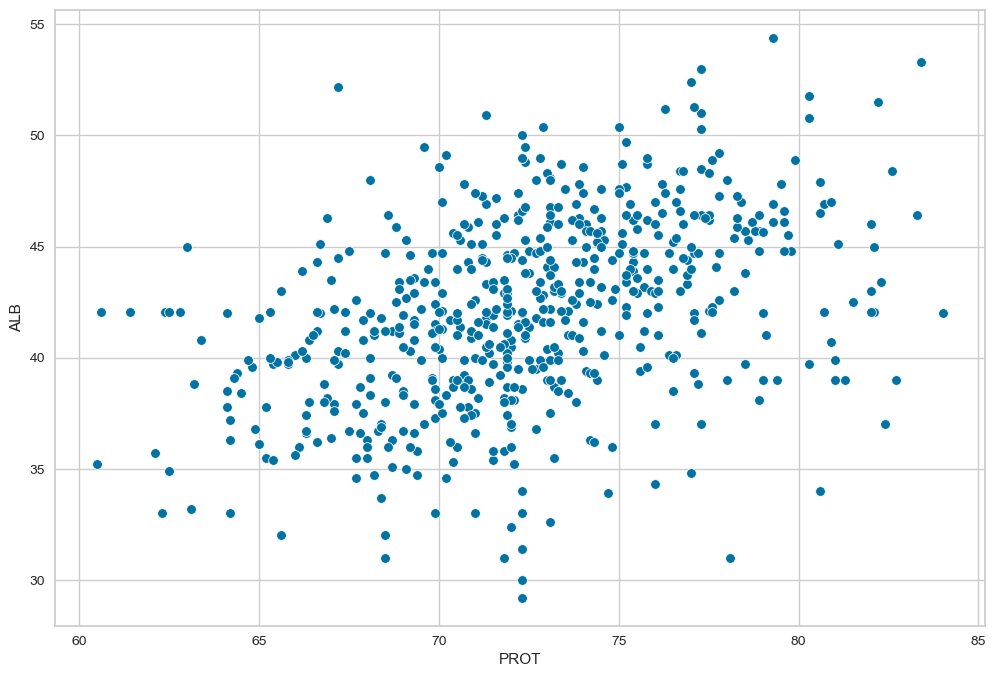

In [19]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='PROT', y='ALB')

**Model dengan algoritma elbow**

In [20]:
df = data[['ALB', 'PROT']]
df

,ALB,PROT
0,38.50,69.0
1,38.50,76.5
2,46.90,79.3
3,43.20,75.7
4,39.20,68.7
...,...,...
610,32.00,68.5
611,42.05,71.3
612,42.05,82.0
613,33.00,71.0


In [21]:
km_data = df.copy()

In [22]:
wcss = []

for n in range (1, 11):
    kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=100, random_state=42)
    kmeans.fit(km_data)
    wcss.append(kmeans.inertia_)

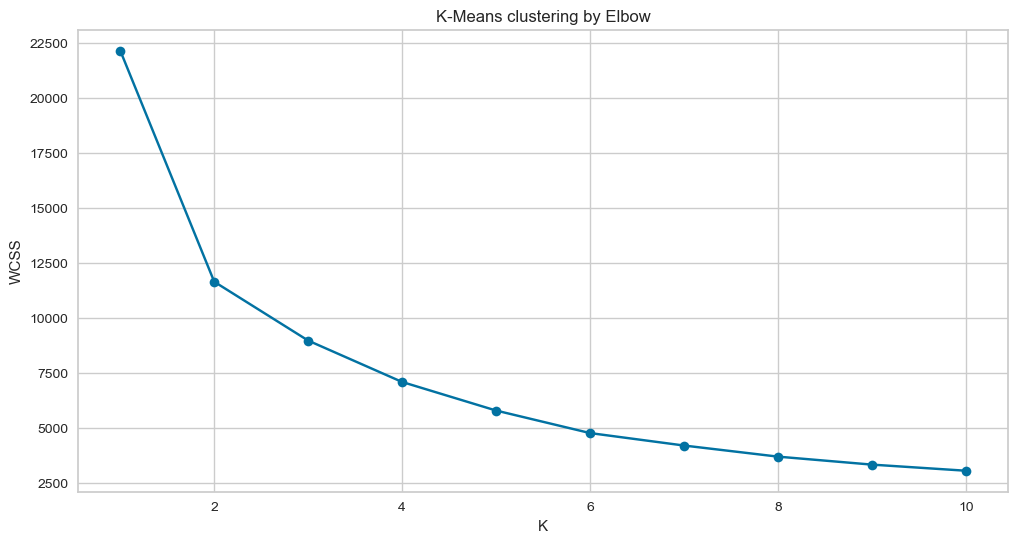

In [23]:
plt.figure(figsize=(12,6))
plt.plot(range(1, 11), wcss, 'o-')
plt.title('K-Means clustering by Elbow')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [24]:
for i in range (1, len(wcss)):
    print(f'cluster {i} -> {wcss[i]}')

cluster 1 -> 11633.583271007727
cluster 2 -> 8956.797827555496
cluster 3 -> 7074.8818236155275
cluster 4 -> 5775.844465545352
cluster 5 -> 4751.213428180922
cluster 6 -> 4184.559684754933
cluster 7 -> 3679.640267967607
cluster 8 -> 3316.6006370473497
cluster 9 -> 3038.532096104159


**K-Means dengan 2 cluster**

In [25]:
km_data_clus2 = df.copy()

In [26]:
kmeans = KMeans(n_clusters=2, random_state=42, max_iter=10000)
kmeans.fit(km_data_clus2)
km_data_clus2['cluster'] = kmeans.labels_
km_data_clus2

,ALB,PROT,cluster
0,38.50,69.0,0
1,38.50,76.5,1
2,46.90,79.3,1
3,43.20,75.7,1
4,39.20,68.7,0
...,...,...,...
610,32.00,68.5,0
611,42.05,71.3,0
612,42.05,82.0,1
613,33.00,71.0,0


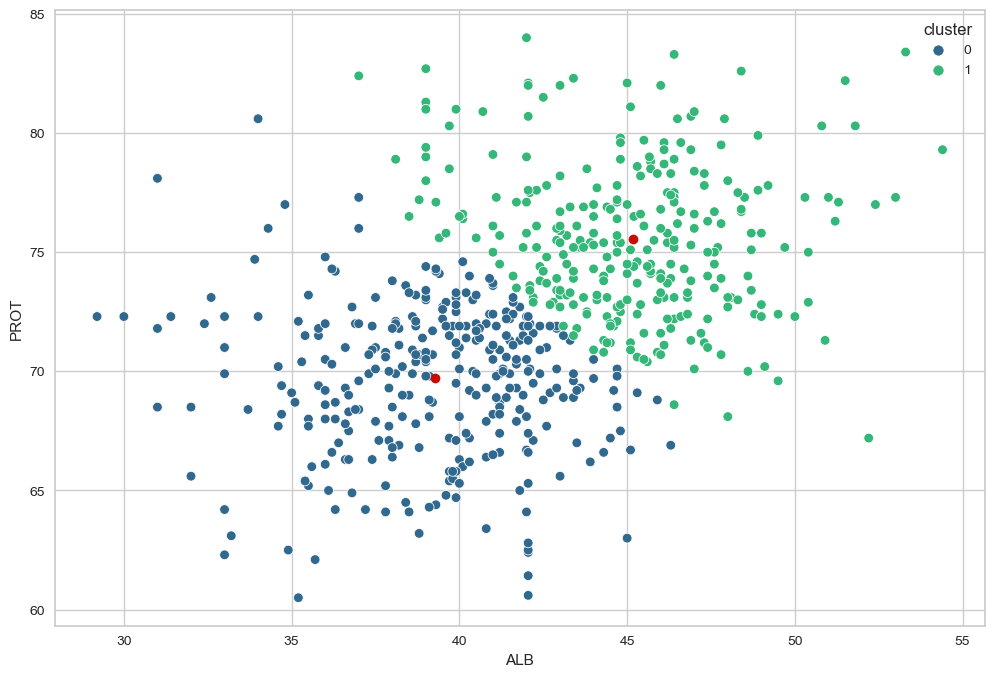

In [27]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=km_data_clus2, x='ALB', y='PROT', hue='cluster', palette='viridis')
plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 'ro', label='centroid')

**K-Means dengan 3 cluster**

In [28]:
km_data_clus3 = df.copy()

In [29]:
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=10000)
kmeans.fit(km_data_clus3)
km_data_clus3['cluster'] = kmeans.labels_
km_data_clus3

,ALB,PROT,cluster
0,38.50,69.0,1
1,38.50,76.5,2
2,46.90,79.3,0
3,43.20,75.7,0
4,39.20,68.7,1
...,...,...,...
610,32.00,68.5,1
611,42.05,71.3,2
612,42.05,82.0,0
613,33.00,71.0,1


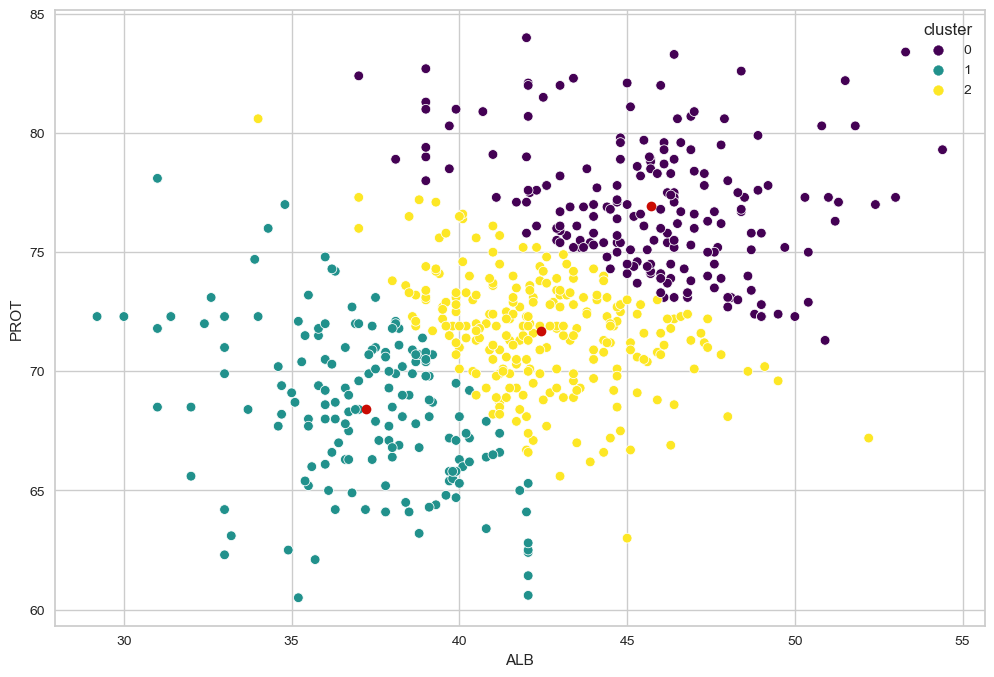

In [30]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=km_data_clus3, x='ALB', y='PROT', hue='cluster', palette='viridis')
plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 'ro', label='centroid')

**K-Means dengan 4 cluster**

In [31]:
km_data_clus4 = df.copy()

kmeans = KMeans(n_clusters=4, random_state=42, max_iter=10000)
kmeans.fit(km_data_clus4)
km_data_clus4['cluster'] = kmeans.labels_
km_data_clus4

,ALB,PROT,cluster
0,38.50,69.0,0
1,38.50,76.5,3
2,46.90,79.3,2
3,43.20,75.7,2
4,39.20,68.7,0
...,...,...,...
610,32.00,68.5,0
611,42.05,71.3,1
612,42.05,82.0,2
613,33.00,71.0,3


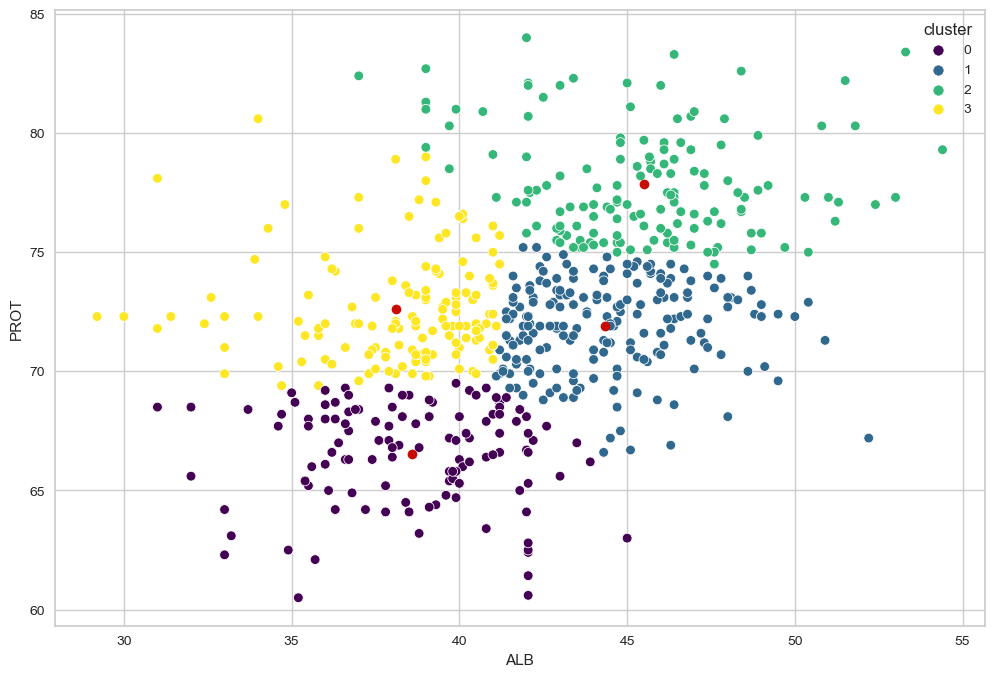

In [32]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=km_data_clus4, x='ALB', y='PROT', hue='cluster', palette='viridis')
plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 'ro', label='centroid')

**K-Means dengan 5 cluster**

In [33]:
km_data_clus5 = df.copy()

kmeans = KMeans(n_clusters=5, random_state=42, max_iter=10000)
kmeans.fit(km_data_clus5)
km_data_clus5['cluster'] = kmeans.labels_
km_data_clus5

,ALB,PROT,cluster
0,38.50,69.0,0
1,38.50,76.5,3
2,46.90,79.3,3
3,43.20,75.7,3
4,39.20,68.7,4
...,...,...,...
610,32.00,68.5,0
611,42.05,71.3,1
612,42.05,82.0,3
613,33.00,71.0,0


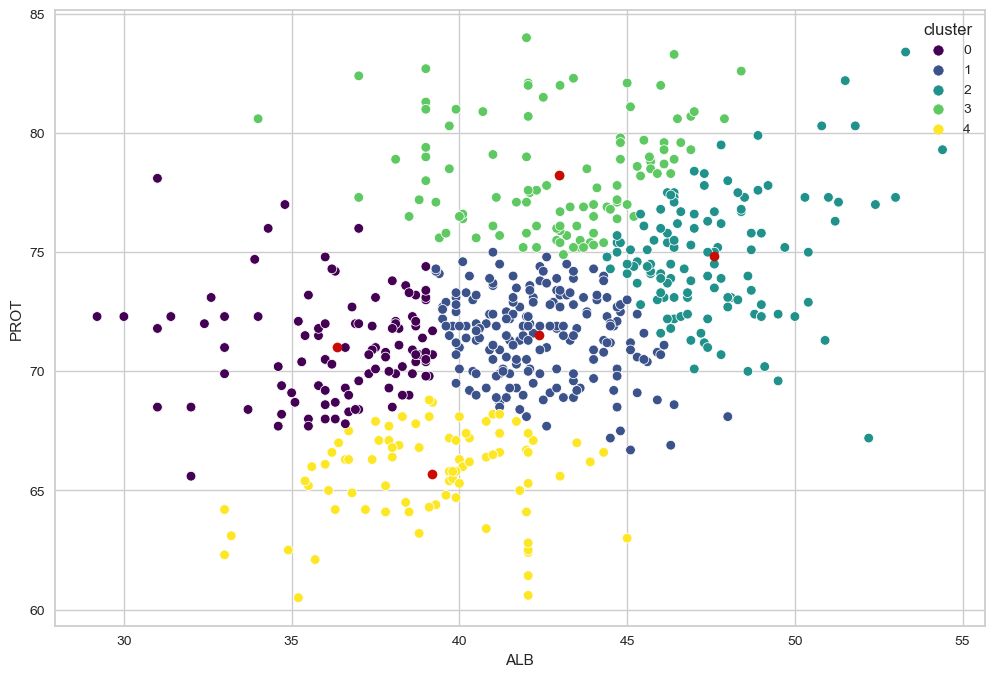

In [34]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=km_data_clus5, x='ALB', y='PROT', hue='cluster', palette='viridis')
plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 'ro', label='centroid')

In [35]:
sil_data = df.copy()

In [36]:
scores = []

for n in range (2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42, max_iter=1000)
    labels = kmeans.fit_predict(sil_data)
    score = silhouette_score(sil_data, labels)
    scores.append(score)

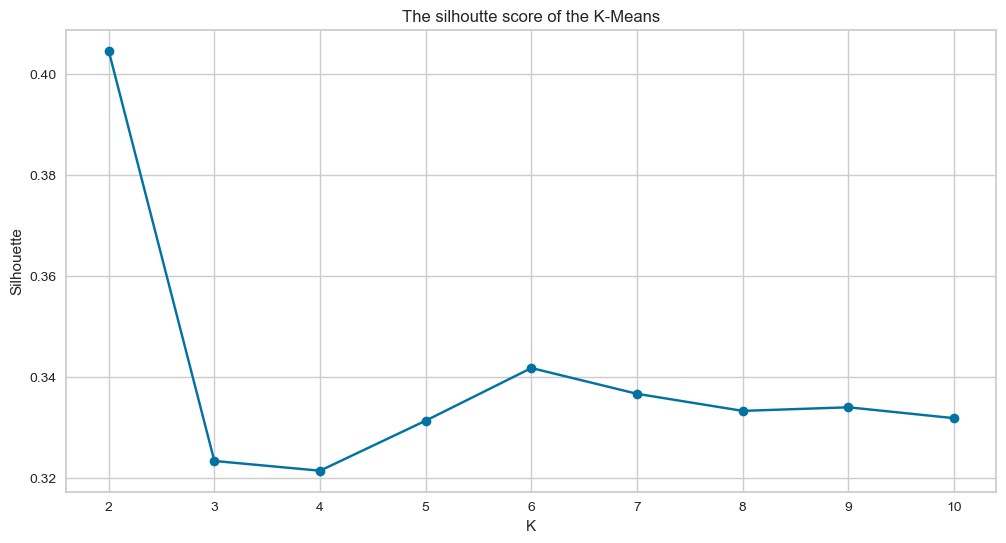

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), scores, '-o')
plt.title('The silhoutte score of the K-Means')
plt.xlabel('K')
plt.ylabel('Silhouette')
plt.grid(True)
plt.show()

In [38]:
for i, score in enumerate(scores):
    print(f'Score of cluster {i+2}: {score}')

Score of cluster 2: 0.4046427514255265
Score of cluster 3: 0.32341273917980007
Score of cluster 4: 0.321478343289599
Score of cluster 5: 0.3313915962919408
Score of cluster 6: 0.34181515568546456
Score of cluster 7: 0.3367060499283354
Score of cluster 8: 0.3333271359646772
Score of cluster 9: 0.33403755733671187
Score of cluster 10: 0.33188143893025834


In [39]:
best_n_cluster = scores.index(max(scores))+2
print(f'Best n cluster: {best_n_cluster}')

Best n cluster: 2


In [40]:
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=10000)
kmeans.fit(sil_data)
sil_data['cluster'] = kmeans.labels_
sil_data

,ALB,PROT,cluster
0,38.50,69.0,1
1,38.50,76.5,2
2,46.90,79.3,0
3,43.20,75.7,0
4,39.20,68.7,1
...,...,...,...
610,32.00,68.5,1
611,42.05,71.3,2
612,42.05,82.0,0
613,33.00,71.0,1


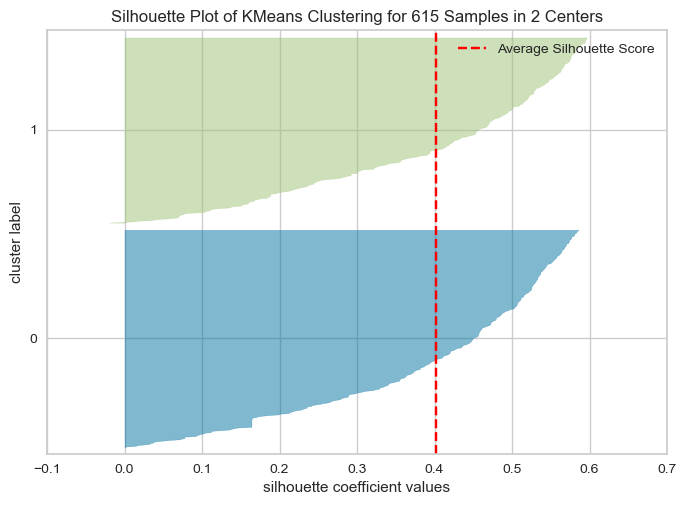

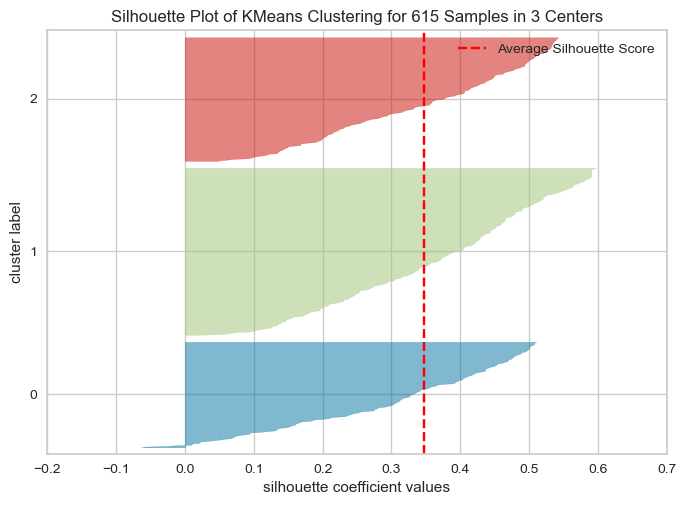

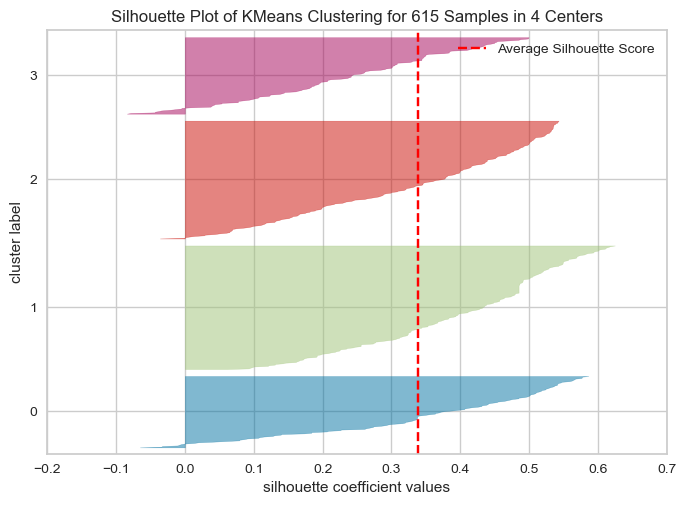

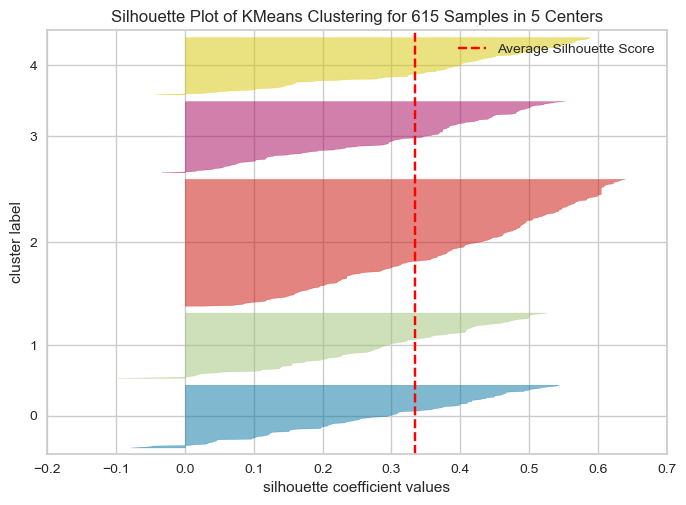

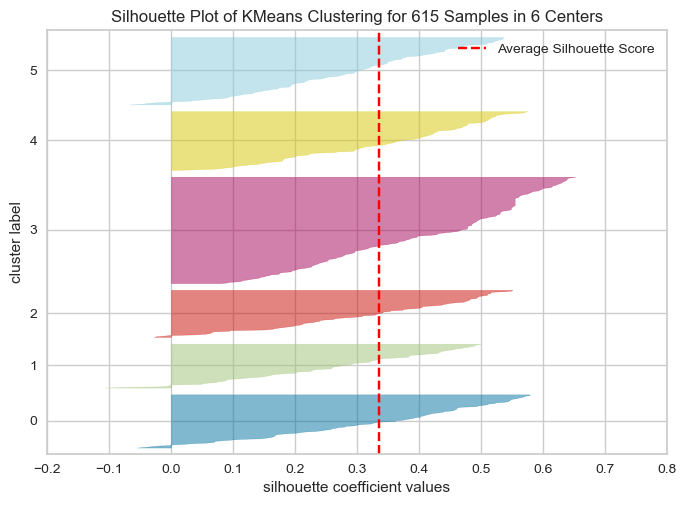

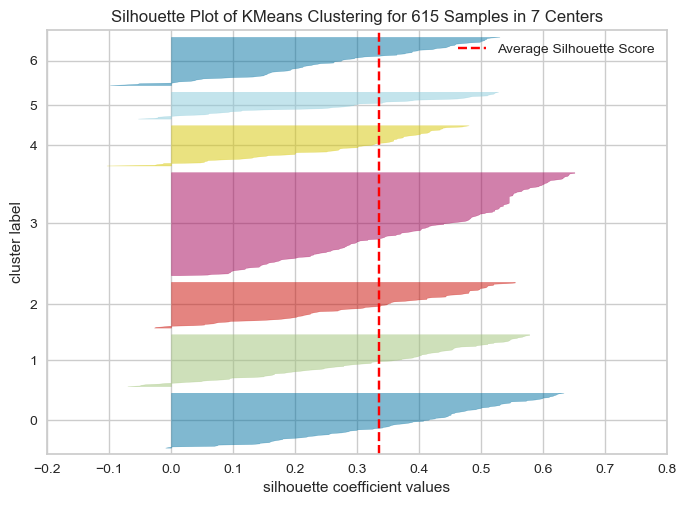

In [41]:
for i in range(2, len(scores) - 1):
    model = KMeans(n_clusters=i, random_state=42)
    visualizer =SilhouetteVisualizer(model, colors='yellowbrick')

    visualizer.fit(sil_data)
    visualizer.show()

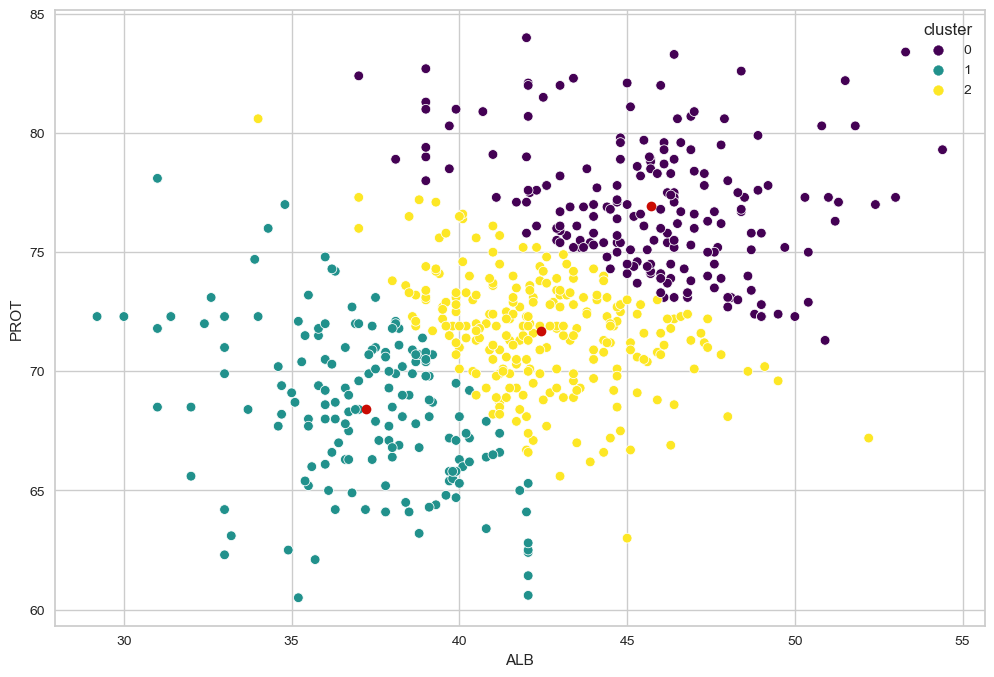

In [42]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=sil_data, x='ALB', y='PROT', hue='cluster', palette='viridis')
plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 'ro', label='centroid')

In [43]:
print(Counter(sil_data['cluster']))

Counter({2: 259, 0: 192, 1: 164})


**Model dengan algoritma Hierarchical**

In [44]:
df_hr = df.copy()

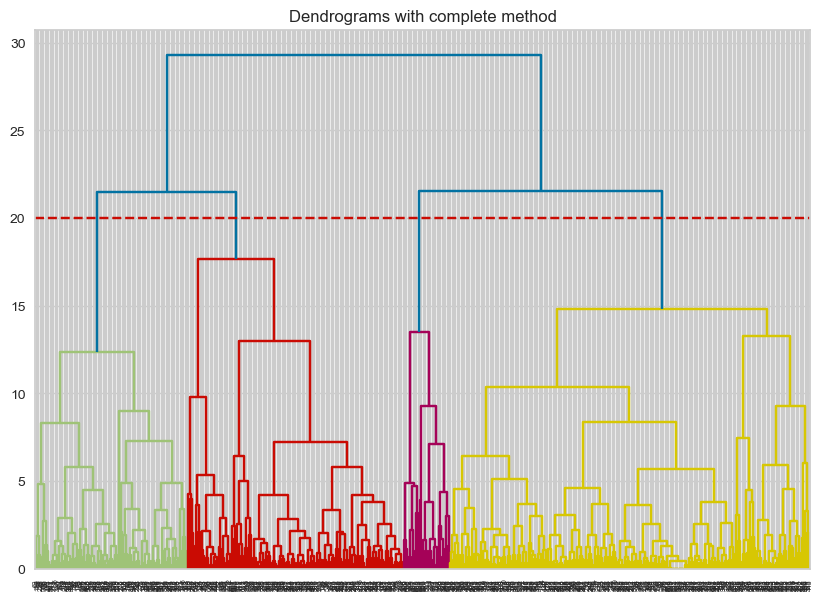

In [45]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms with complete method")
dend = sch.dendrogram(sch.linkage(df_hr, method='complete'))
plt.axhline(y=20, color='r', linestyle='--')
plt.show()

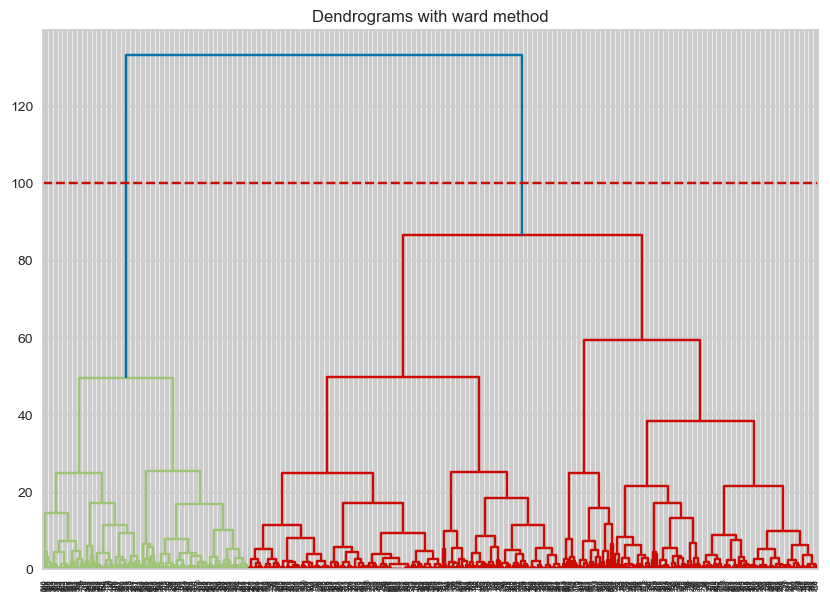

In [46]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms with ward method")
dend = sch.dendrogram(sch.linkage(df_hr, method='ward'))
plt.axhline(y=100, color='r', linestyle='--')
plt.show()

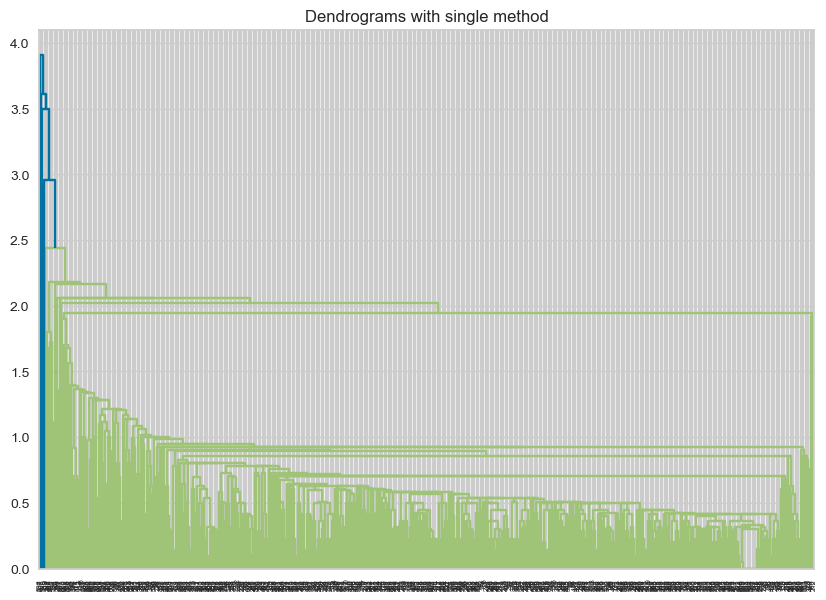

In [47]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms with single method")
dend = sch.dendrogram(sch.linkage(df_hr, method='single'))

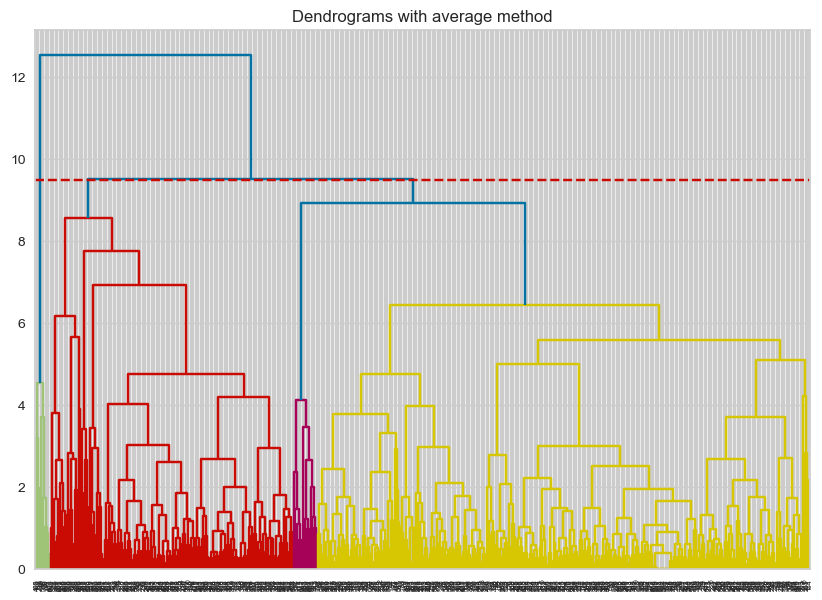

In [48]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms with average method")
dend = sch.dendrogram(sch.linkage(df_hr, method='average'))
plt.axhline(y=9.5, color='r', linestyle='--')
plt.show()

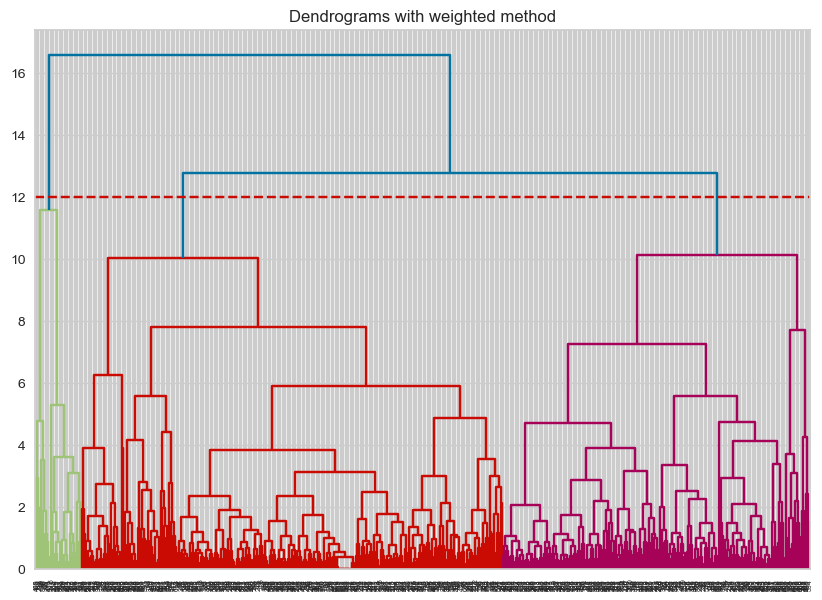

In [49]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms with weighted method")
dend = sch.dendrogram(sch.linkage(df_hr, method='weighted'))
plt.axhline(y=12, color='r', linestyle='--')

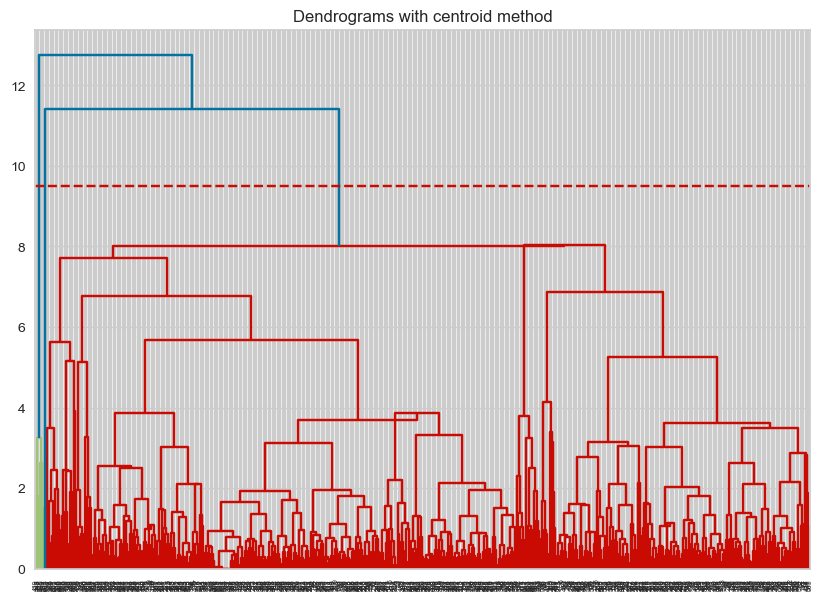

In [50]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms with centroid method")
dend = sch.dendrogram(sch.linkage(df_hr, method='centroid'))
plt.axhline(y=9.5, color='r', linestyle='--')


In [51]:
scores = []

for i in range(2, 11):
    hr = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    labels = hr.fit_predict(df_hr)
    score = silhouette_score(df_hr, labels)
    scores.append(score)

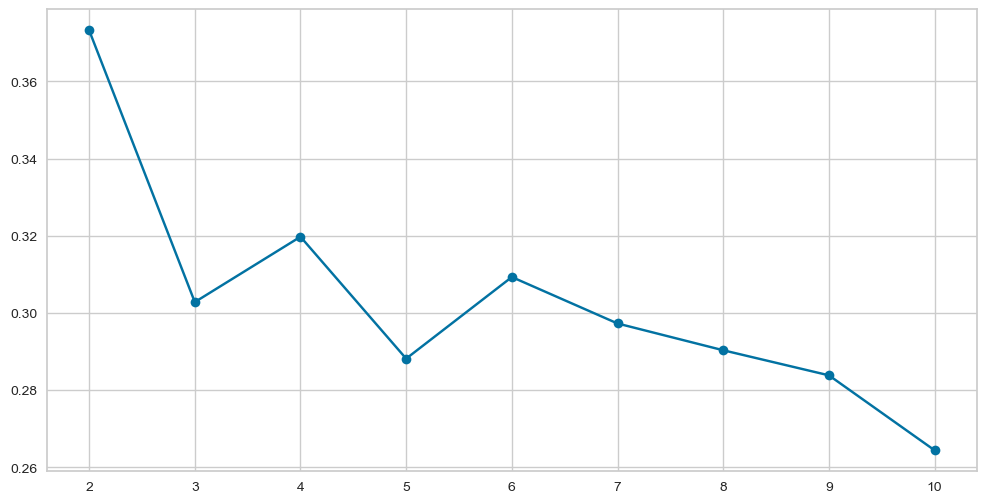

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), scores, '-o')

In [62]:
hr = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hr.fit_predict(df_hr)
df_hr['cluster'] = labels
df_hr

,ALB,PROT,cluster
0,38.50,69.0,1
1,38.50,76.5,0
2,46.90,79.3,0
3,43.20,75.7,0
4,39.20,68.7,1
...,...,...,...
610,32.00,68.5,1
611,42.05,71.3,0
612,42.05,82.0,0
613,33.00,71.0,1


In [63]:
print(Counter(df_hr['cluster']))

Counter({0: 452, 1: 163})


<Axes: xlabel='ALB', ylabel='PROT'>

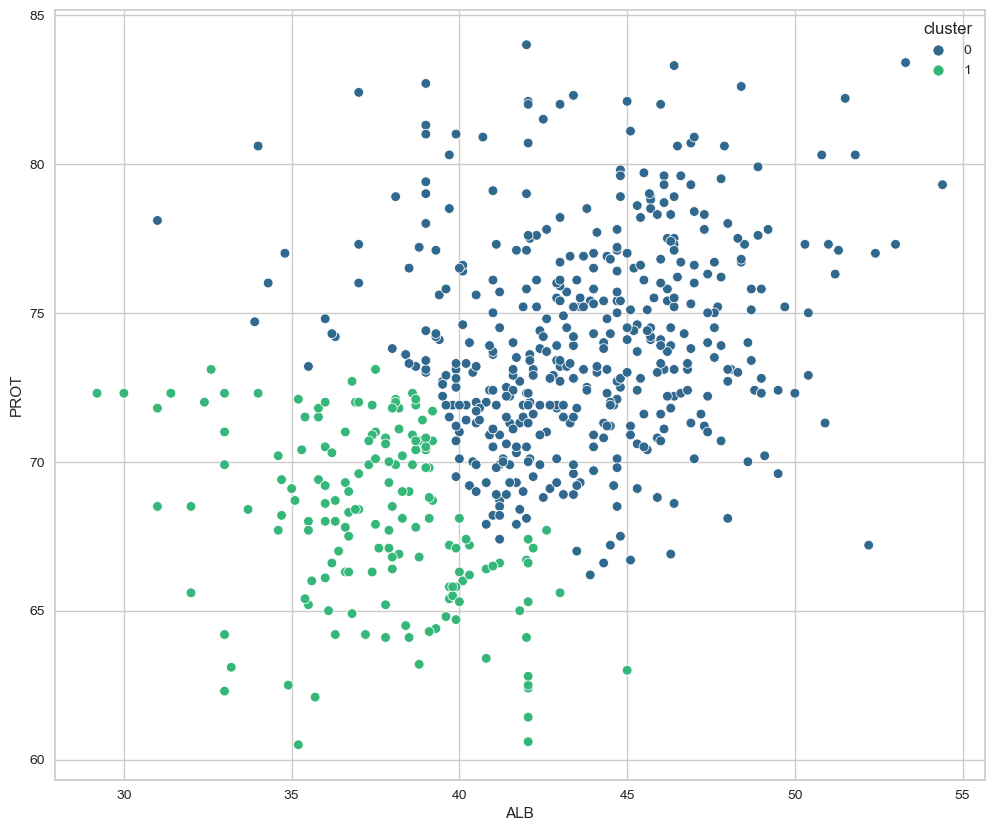

In [64]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df_hr, x='ALB', y='PROT', hue='cluster', palette='viridis')

In [65]:
hr = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
labels = hr.fit_predict(df_hr)
df_hr['cluster'] = labels
df_hr

,ALB,PROT,cluster
0,38.50,69.0,2
1,38.50,76.5,2
2,46.90,79.3,0
3,43.20,75.7,0
4,39.20,68.7,2
...,...,...,...
610,32.00,68.5,2
611,42.05,71.3,2
612,42.05,82.0,0
613,33.00,71.0,2


<Axes: xlabel='ALB', ylabel='PROT'>

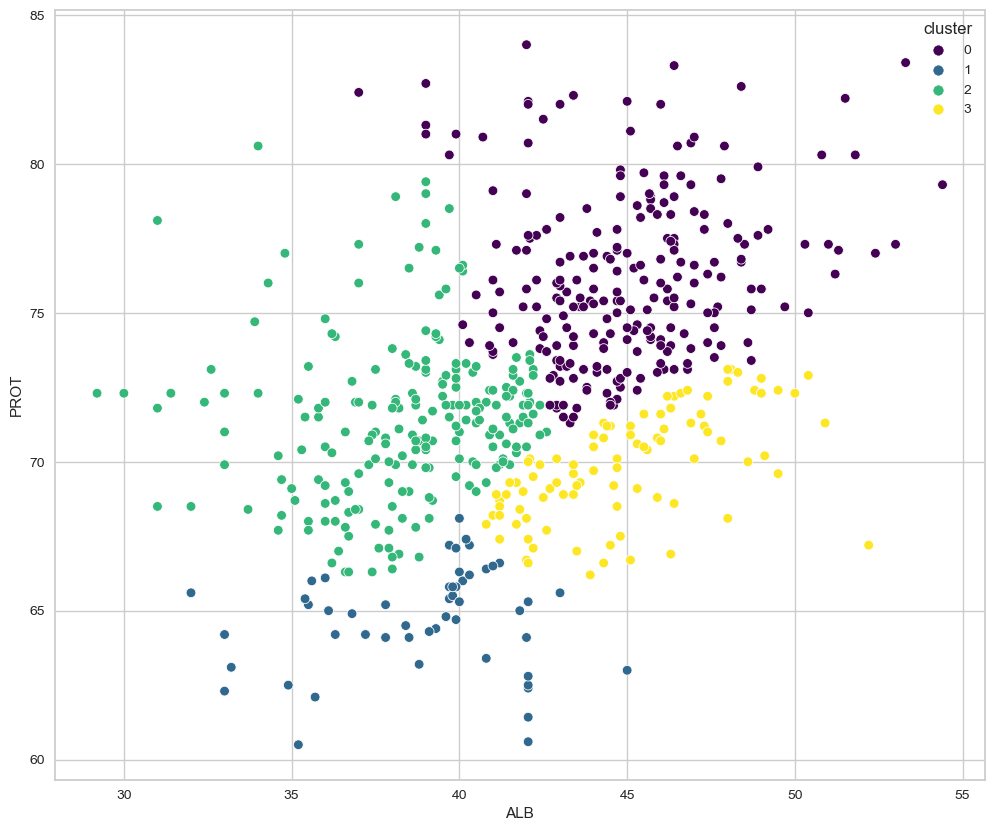

In [66]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df_hr, x='ALB', y='PROT', hue='cluster', palette='viridis')

**Model dengan algoritma DBSCAN**

In [56]:
df_db = df.copy()

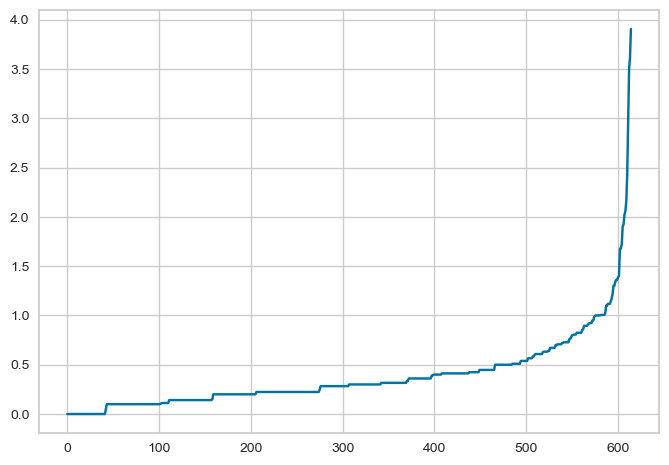

In [57]:
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(df_db)
distances, indices = nbrs.kneighbors(df_db)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [58]:
best_eps = 0
best_min_sample = 0
best_score = -1

for i in np.arange(0.1, 1.0, 0.1):
    for min_samples in range(1, 10):
        dbscan = DBSCAN(eps=i, min_samples=min_samples)
        labels = dbscan.fit_predict(df_db)
        
        if len(set(labels)) > 1:
            score = silhouette_score(df, labels)
            
            if score > best_score:
                best_score = score
                best_eps = i
                best_min_sample = min_samples

print(f'Best eps: {best_eps}, best min_Sample: {best_min_sample}')

Best eps: 0.30000000000000004, best min_Sample: 1


In [89]:
dbscan = DBSCAN(eps=0.3, min_samples=1)
labels = dbscan.fit_predict(df_db)
df_db['cluster'] = labels
df_db

,ALB,PROT,cluster
0,38.50,69.0,0
1,38.50,76.5,1
2,46.90,79.3,2
3,43.20,75.7,3
4,39.20,68.7,4
...,...,...,...
610,32.00,68.5,442
611,42.05,71.3,30
612,42.05,82.0,157
613,33.00,71.0,443


Text(0.5, 1.0, 'DBSCAN clustering')

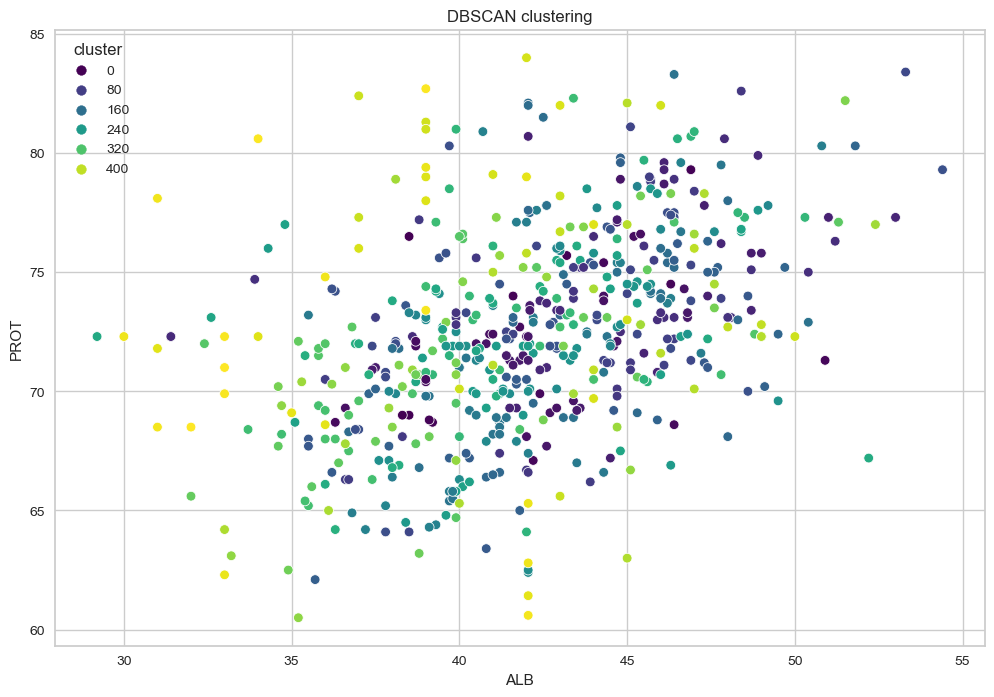

In [90]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_db, x='ALB', y='PROT', hue='cluster', palette='viridis')
plt.title('DBSCAN clustering')

In [100]:
print(Counter(df_db['cluster'].sort_values()))

Counter({27: 13, 30: 6, 172: 6, 59: 4, 107: 4, 66: 3, 82: 3, 88: 3, 113: 3, 129: 3, 137: 3, 148: 3, 209: 3, 227: 3, 233: 3, 245: 3, 253: 3, 324: 3, 327: 3, 0: 2, 2: 2, 4: 2, 13: 2, 14: 2, 16: 2, 17: 2, 20: 2, 22: 2, 24: 2, 28: 2, 29: 2, 32: 2, 33: 2, 34: 2, 35: 2, 36: 2, 42: 2, 44: 2, 45: 2, 49: 2, 50: 2, 52: 2, 53: 2, 62: 2, 65: 2, 68: 2, 70: 2, 71: 2, 75: 2, 78: 2, 81: 2, 84: 2, 89: 2, 101: 2, 102: 2, 104: 2, 106: 2, 108: 2, 111: 2, 114: 2, 115: 2, 116: 2, 117: 2, 119: 2, 121: 2, 124: 2, 131: 2, 132: 2, 134: 2, 138: 2, 143: 2, 146: 2, 150: 2, 153: 2, 157: 2, 159: 2, 160: 2, 164: 2, 165: 2, 166: 2, 167: 2, 170: 2, 171: 2, 177: 2, 182: 2, 183: 2, 184: 2, 185: 2, 189: 2, 191: 2, 194: 2, 195: 2, 199: 2, 201: 2, 202: 2, 204: 2, 206: 2, 212: 2, 216: 2, 217: 2, 219: 2, 221: 2, 222: 2, 223: 2, 225: 2, 229: 2, 230: 2, 232: 2, 235: 2, 241: 2, 249: 2, 259: 2, 260: 2, 265: 2, 266: 2, 267: 2, 274: 2, 276: 2, 277: 2, 279: 2, 287: 2, 289: 2, 293: 2, 294: 2, 299: 2, 301: 2, 311: 2, 313: 2, 315: 2, 3

In [93]:
df_db2 = df.copy()

In [101]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(df_db2)
df_db2['cluster'] = labels
df_db2

,ALB,PROT,cluster
0,38.50,69.0,-1
1,38.50,76.5,-1
2,46.90,79.3,-1
3,43.20,75.7,0
4,39.20,68.7,-1
...,...,...,...
610,32.00,68.5,-1
611,42.05,71.3,2
612,42.05,82.0,-1
613,33.00,71.0,-1


Text(0.5, 1.0, 'DBSCAN clustering')

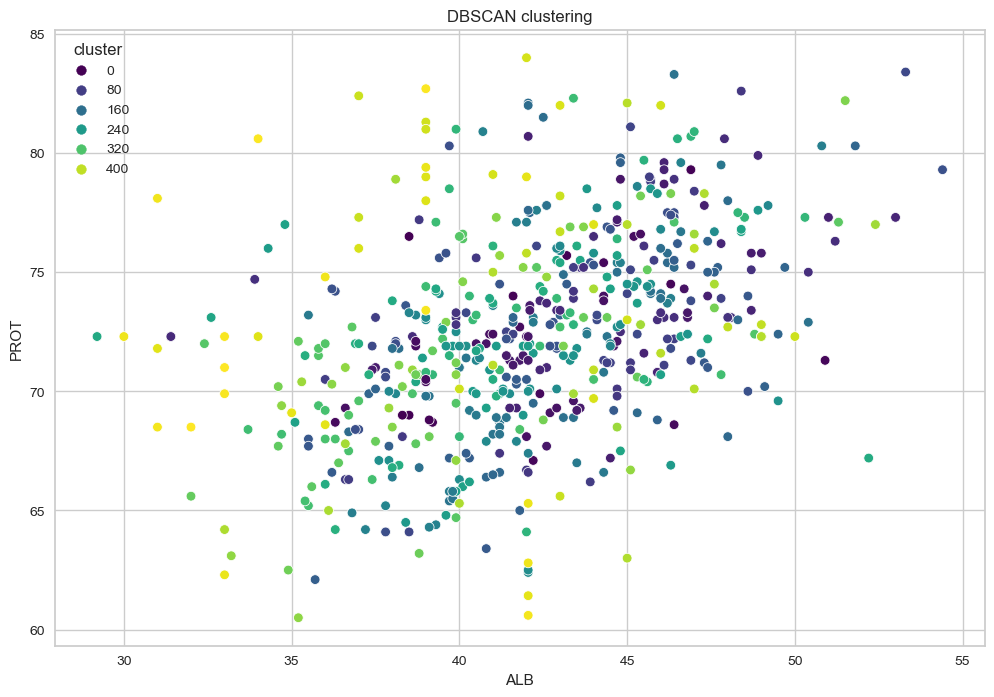

In [102]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_db, x='ALB', y='PROT', hue='cluster', palette='viridis')
plt.title('DBSCAN clustering')

In [104]:
print(Counter(df_db2['cluster'].sort_values()))

Counter({-1: 340, 2: 89, 0: 22, 7: 20, 9: 18, 1: 13, 3: 12, 4: 10, 14: 9, 15: 9, 5: 7, 6: 7, 10: 7, 11: 7, 16: 7, 8: 6, 12: 6, 18: 6, 13: 5, 17: 5, 19: 5, 20: 5})
